#  Problem Description

**Company ABC, a Deloitte member firm, has always been a champion of diversity and inclusion in the workplace. However, there has been some talking about the lack of diversity in Company ABC in recent days. The Talent Leader is very concerned about that and has tasked you to analyze its internal data of employees to understand whether the company has been treating its employees fairly.**

### Questions
1. In company ABC, there are 6 levels of employee hierarchy described below. Can you identify the corresponding level of each employee and hence the numbers of employees in each level?
> *    Individual contributors (IC) – don’t manage anyone
> *    Middle managers (MM) – the direct bosses of IC
> *    Directors (D) – the direct bosses of MM
> *    VP – the direct bosses of D
> *    Executives (E) – the direct bosses of VP
> *    CEO – the direct boss of E 
      
2. How many people does each employee manage? You should have a table with employee IDs and the number of people being managed. You may consider that if Peter directly manages 2 people and these 2 people manage 5 people each, then we can conclude that Peter actually manages 12 people. 

3. Build a model that can predict the salary of each employee.

4. Describe the main factors affecting the employee salaries. Do you think the company has been treating its employees fairly? Do you see any bias? What are some next steps you would suggest to the Talent Leader?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%ls

Interview_Q1.ipynb     company_hierarchy.csv*
all_employees.csv*     employee.csv*


##  Load Raw Datasets

*Review the whole 3 datasets to check whether there is missing value within the datasets*

In [7]:
df_emp = pd.read_csv('employee.csv',index_col=False)
#df_emp.describe(include='all')
#print(df_emp.info())
#print('-'*20)
#print(df_emp.head())

In [5]:
df_cmp = pd.read_csv('company_hierarchy.csv',index_col=False)
#print(df_cmp.info())
#print('-'*20)
#print(df_cmp.head())

In [6]:
df_all = pd.read_csv('all_employees.csv',index_col=False)
df_all.set_index('employee_id',inplace=True)
#print(df_all.info())
#print('-'*20)
#print(df_all.head())

###  Solution to question 1

> * *Identify the corresponding level of each employee*

In [135]:
def check_level(df):
    while True:
        key_in = input('Please enter the employee_id: ')
        try:
            empid = int(key_in)
            break
        except ValueError:
            print ('Not a valid input, should be an integer. Try again!')
            continue
    
    if empid not in df.index:
        print ('Unidentified employee_id')
    else:
        print ('The corresponding level of employee_id: {} is {}.'.format(empid, df.loc[empid].level))

    
check_level(df_all)

print('='*50)

Please enter the employee_id: 61554
The corresponding level of employee_id: 61554 is CEO.


In [134]:
df_all[df_all.index==61554]

,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept,level,n_subordinates
employee_id,,,,,,,,,
61554,1,700.0,PhD,M,7,-1,CEO,CEO,9999


> * *number of employee in each level*

In [114]:
df_all['level'].value_counts()
# or can use df_all['level'].groupby(df_all['level']).count()

IC     9000
MM      800
D       160
VP       35
E         4
CEO       1
Name: level, dtype: int64

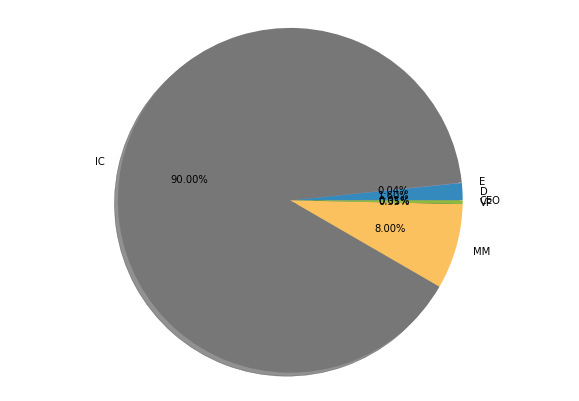

In [121]:
labels = df_all['level'].astype('category').cat.categories.tolist()
counts = df_all['level'].value_counts()
sizes = [counts[var] for var in labels]
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True) 
ax1.axis('equal')
plt.show()

###  Solution to question 2

In [137]:
n_people_managed = np.zeros((len(df_all.index),1))
df_all['n_people_manage'] = n_people_managed
df_all['n_people_manage'] = df_all['n_people_manage'].astype(int)
df_all.head()

,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept,level,n_subordinates,n_people_manage
employee_id,,,,,,,,,,
138719,0,273.0,Master,M,2,43602,engineering,IC,0,0
3192,0,301.0,Bachelor,F,1,87847,sales,IC,0,0
114657,0,261.0,Master,F,2,180854,sales,IC,0,0
29039,0,86.0,High_School,F,4,88370,HR,IC,0,0
118607,0,126.0,Bachelor,F,3,23565,sales,IC,0,0


In [138]:
levels = ['MM','D','VP','E','CEO']

for level in levels:
    df_tmp = df_all[df_all['level']==level].reset_index()
    tmp_ids=list(df_tmp['employee_id'])
    
    for boss_id in tmp_ids:
        tmp = df_all.apply(lambda x: True if x['boss_id'] == boss_id else False , axis=1)
        
        if level =='MM':
            n_people = len(tmp[tmp == True].index)
            df_all.loc[boss_id,'n_people_manage'] = n_people
        else:
            n_people = len(tmp[tmp == True].index) + df_all[tmp==True].n_people_manage.sum()
            df_all.loc[boss_id,'n_people_manage'] = n_people

In [139]:
df_all[df_all['level']=='E']

,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept,level,n_subordinates,n_people_manage
employee_id,,,,,,,,,,
93708,1,500.0,PhD,F,28,61554,HR,E,1693,1693
51535,1,650.0,PhD,M,33,61554,engineering,E,2695,2695
11277,1,550.0,Master,M,22,61554,sales,E,3598,3598
110464,1,550.0,Master,M,21,61554,marketing,E,2009,2009


###  Solution to question 3

In [61]:
import seaborn as sns

In [39]:
def plotfig(df,x,y,h):
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.boxplot(x=x,y=y,hue=h,data=df)
    plt.title('{} VS {}'.format(x.capitalize(),y.capitalize()), size=24)
    plt.xlabel('{}'.format(x.capitalize()), size=18)
    plt.ylabel('{}'.format(y.capitalize()), size=18)

                     salary
dept        sex            
CEO         M    700.000000
HR          F     84.399811
            M     84.827044
engineering F    246.785395
            M    242.444444
marketing   F    192.502304
            M    195.639441
sales       F    194.618120
            M    194.207196
******************************


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


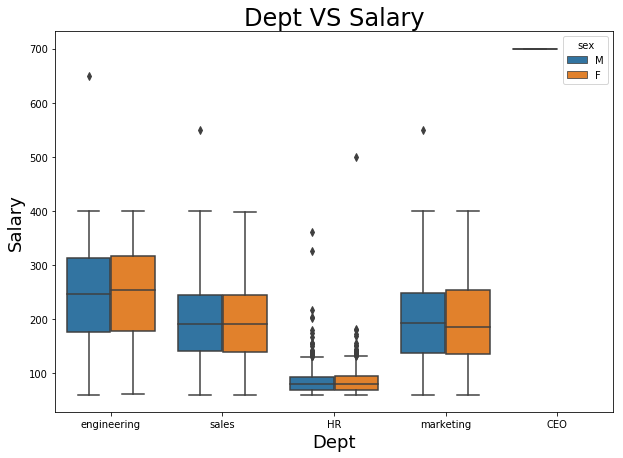

In [41]:
df_sub1 = df_all.reset_index()[['dept','salary','sex']]
print(df_sub1.groupby(['dept','sex']).mean())
print('*'*30)
plotfig(df_sub1,'dept','salary','sex')

                      salary
degree_level sex            
Bachelor     F    168.774821
             M    198.589306
High_School  F    169.123693
             M    198.141274
Master       F    170.709291
             M    197.922129
PhD          F    175.620416
             M    200.810259
******************************


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


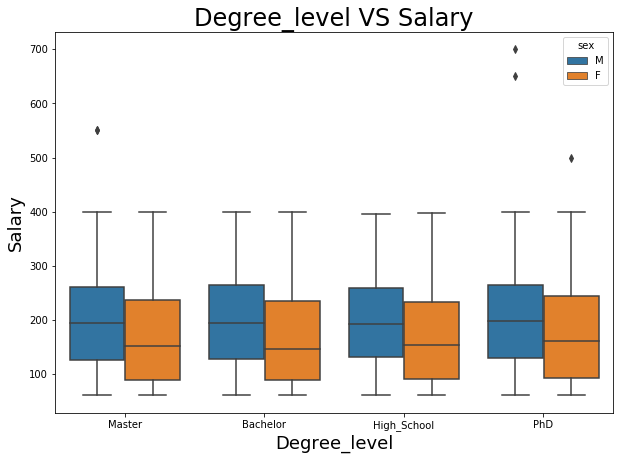

In [42]:
df_sub2 = df_all.reset_index()[['degree_level','salary','sex']]
print(df_sub2.groupby(['degree_level','sex']).mean())
print('*'*30)
plotfig(df_sub2,'degree_level','salary','sex')

                        salary
yrs_experience sex            
1              F    163.362952
               M    199.167994
2              F    169.114035
               M    199.491708
3              F    172.455285
               M    199.030981
4              F    171.574074
               M    199.061155
5              F    173.640957
               M    193.269287
******************************


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


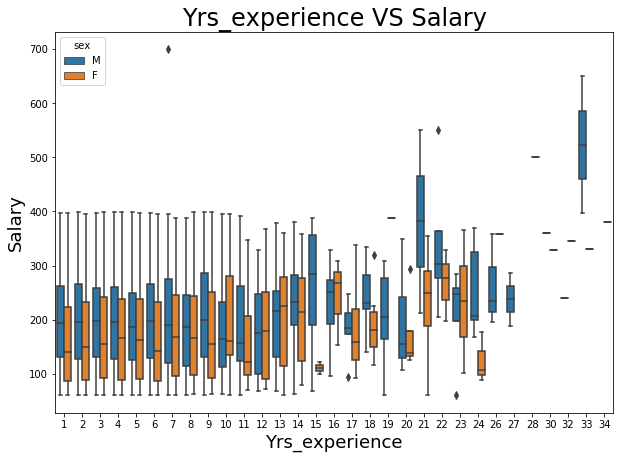

In [45]:
df_sub3 = df_all.reset_index()[['yrs_experience','salary','sex']]
print(df_sub3.groupby(['yrs_experience','sex']).mean().head(10))
print('*'*30)
plotfig(df_sub3,'yrs_experience','salary','sex')

                       salary
signing_bonus sex            
0             F    163.398612
              M    194.476093
1             F    192.549121
              M    208.562775
******************************


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


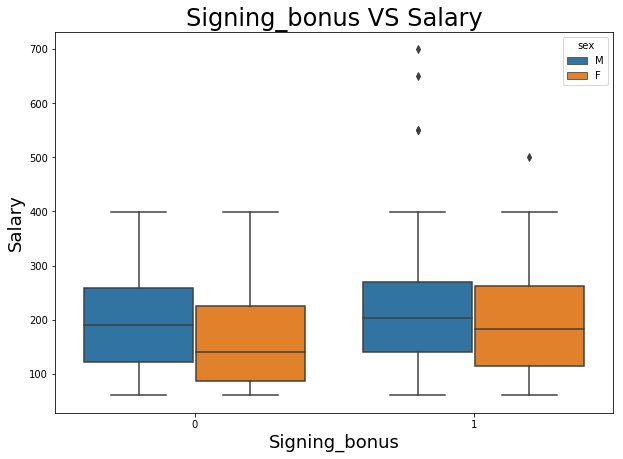

In [46]:
df_sub4 = df_all.reset_index()[['signing_bonus','salary','sex']]
print(df_sub4.groupby(['signing_bonus','sex']).mean())
print('*'*30)
plotfig(df_sub4,'signing_bonus','salary','sex')

               salary
level sex            
CEO   M    700.000000
D     F    209.085106
      M    213.699115
E     F    500.000000
      M    583.333333
IC    F    169.473457
      M    198.279340
MM    F    182.935606
      M    197.171642
VP    F    259.444444
      M    257.538462
******************************


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


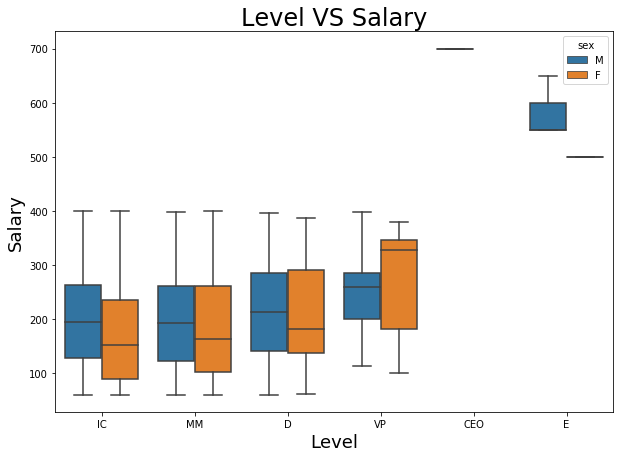

In [47]:
df_sub5 = df_all.reset_index()[['level','salary','sex']]
print(df_sub5.groupby(['level','sex']).mean())
print('*'*30)
plotfig(df_sub5,'level','salary','sex')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [9]:
df_model = df_all.reset_index()
df_model = df_model[['signing_bonus','degree_level','sex','yrs_experience','dept','level','salary']]

In [10]:
df_model = pd.get_dummies(df_model,drop_first=True)
df_model.head()

,signing_bonus,yrs_experience,salary,degree_level_High_School,degree_level_Master,degree_level_PhD,sex_M,dept_HR,dept_engineering,dept_marketing,dept_sales,level_D,level_E,level_IC,level_MM,level_VP
0,0,2,273.0,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,301.0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,2,261.0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,4,86.0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,3,126.0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [11]:
y = df_model['salary']
X = df_model.drop(['salary'],axis=1)
X.head()

,signing_bonus,yrs_experience,degree_level_High_School,degree_level_Master,degree_level_PhD,sex_M,dept_HR,dept_engineering,dept_marketing,dept_sales,level_D,level_E,level_IC,level_MM,level_VP
0,0,2,0,1,0,1,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,4,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,3,0,0,0,0,0,0,0,1,0,0,1,0,0


[Text(0.5,0,'signing_bonus'),
 Text(1.5,0,'yrs_experience'),
 Text(2.5,0,'salary'),
 Text(3.5,0,'degree_level_High_School'),
 Text(4.5,0,'degree_level_Master'),
 Text(5.5,0,'degree_level_PhD'),
 Text(6.5,0,'sex_M'),
 Text(7.5,0,'dept_HR'),
 Text(8.5,0,'dept_engineering'),
 Text(9.5,0,'dept_marketing'),
 Text(10.5,0,'dept_sales'),
 Text(11.5,0,'level_D'),
 Text(12.5,0,'level_E'),
 Text(13.5,0,'level_IC'),
 Text(14.5,0,'level_MM'),
 Text(15.5,0,'level_VP')]

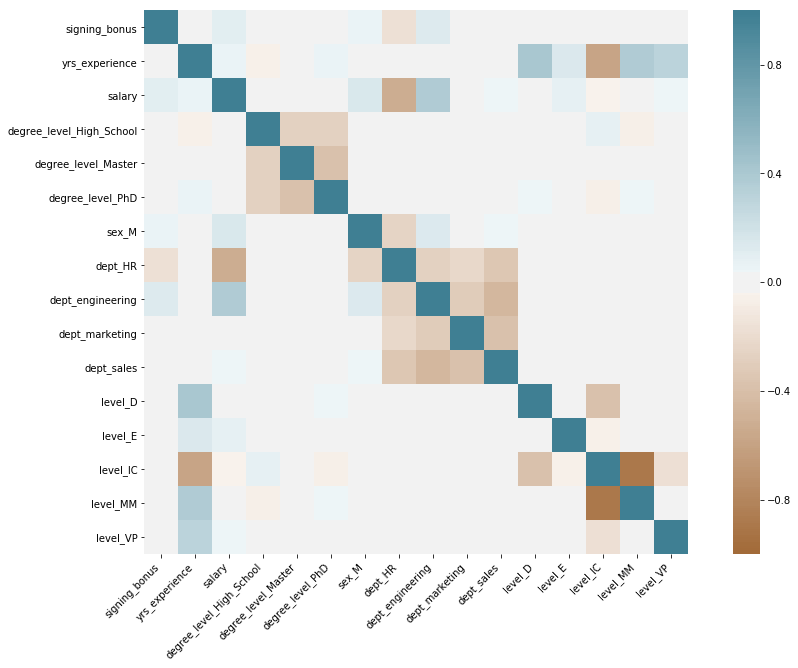

In [52]:
f, ax = plt.subplots(figsize=(16, 10))
corr = df_model.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [57]:
corr.sort_values('salary',ascending=False)['salary'][1:]

dept_engineering            0.371571
sex_M                       0.148761
signing_bonus               0.105671
level_E                     0.083953
yrs_experience              0.051480
level_VP                    0.045907
dept_sales                  0.044081
level_D                     0.033297
dept_marketing              0.031071
degree_level_PhD            0.018971
level_MM                    0.011143
degree_level_High_School   -0.005122
degree_level_Master        -0.006755
level_IC                   -0.040550
dept_HR                    -0.530702
Name: salary, dtype: float64

In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print('X_Train set shape: ',X_train.shape)
print('X_Test set shape: ',X_test.shape)
print('y_Train set shape: ',y_train.shape)
print('y_Test set shape: ',y_test.shape)

X_Train set shape:  (8000, 15)
X_Test set shape:  (2000, 15)
y_Train set shape:  (8000,)
y_Test set shape:  (2000,)


In [83]:
steps = [('scaler',StandardScaler()),('svr',SVR())]
pipe = Pipeline(steps)
parameteres = {'svr__C':[0.001,0.1,10,100,10e5], 'svr__gamma':[0.1,0.01]}
grid = GridSearchCV(pipe, param_grid=parameteres, cv=5)
grid.fit(X_train,y_train)
print ("R^2 score = {}".format(grid.score(X_test,y_test)))
print (grid.best_params_)

R^2 score = 0.3506577246160829
{'svr__C': 100, 'svr__gamma': 0.01}


In [ ]:
!conda install keras --yes
import keras

def build_model():
    model = keras.Sequential([
    keras.layers.Dense(15, activation='relu', input_shape=[15]),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1)])

    model.compile(loss='mse',optimizer='Adam',metrics=['mae', 'mse'])
    return model

model = build_model()
model.fit(X_train, y_train, epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)